In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
'exec(% matplotlib inline)'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

In [3]:
disease_df = pd.read_csv("inn.csv")

In [4]:
disease_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


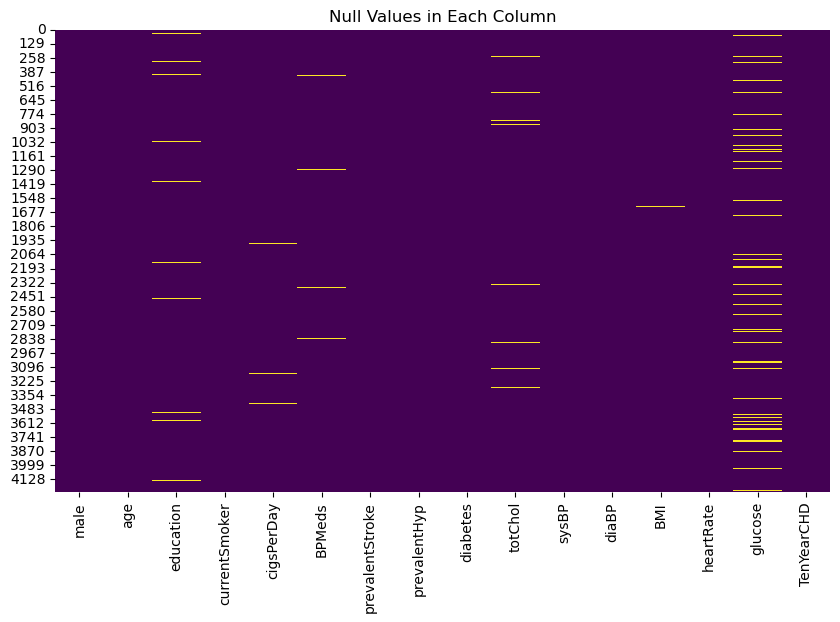

In [5]:
plt.figure(figsize=(10, 6))
sns.heatmap(disease_df.isnull(), cmap='viridis', cbar=False)
plt.title('Null Values in Each Column')
plt.show()

In [6]:
disease_df.drop(['education'], inplace = True, axis = 1) # Education was unrelated feature to our dataset . 
disease_df.rename(columns ={'male':'Sex_male'}, inplace = True)

In [7]:
disease_df.dropna(axis = 0, inplace = True)
print(disease_df.head(), disease_df.shape)
print(disease_df.TenYearCHD.value_counts())

   Sex_male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0         1   39              0         0.0     0.0                0   
1         0   46              0         0.0     0.0                0   
2         1   48              1        20.0     0.0                0   
3         0   61              1        30.0     0.0                0   
4         0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           

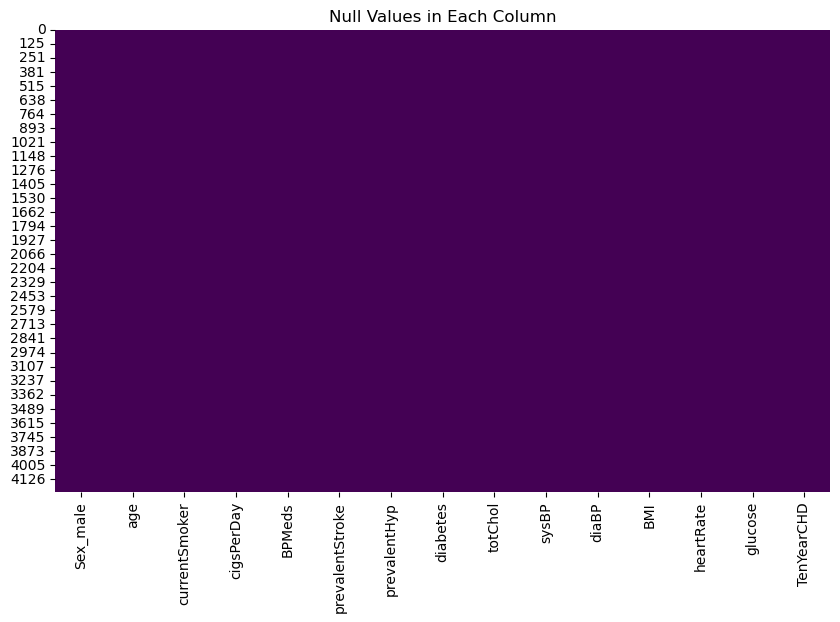

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(disease_df.isnull(), cmap='viridis', cbar=False)
plt.title('Null Values in Each Column')
plt.show()

In [12]:
X = np.asarray(disease_df[['age', 'Sex_male', 'cigsPerDay', 
                           'totChol', 'sysBP', 'glucose' , 'BMI']])
y = np.asarray(disease_df['TenYearCHD'])
#here we set TenYearCHD to find out that the person has a 10-year risk of coronary heart disease 

In [13]:
X = preprocessing.StandardScaler().fit(X).transform(X)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( 
        X, y, test_size = 0.3, random_state = 4)

In [47]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2625, 7) (2625,)
Test set: (1126, 7) (1126,)


C:\Users\erfan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\erfan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\erfan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\erfan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

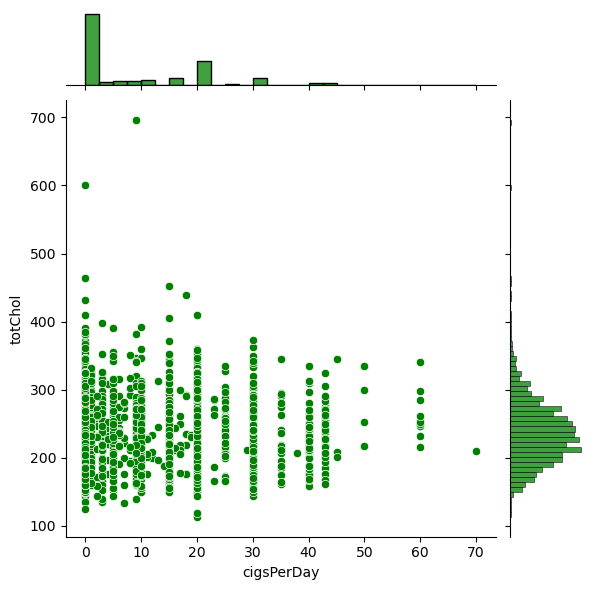

In [57]:
sns.jointplot(x='cigsPerDay',y='totChol',data=disease_df,color='green')

C:\Users\erfan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\erfan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\erfan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


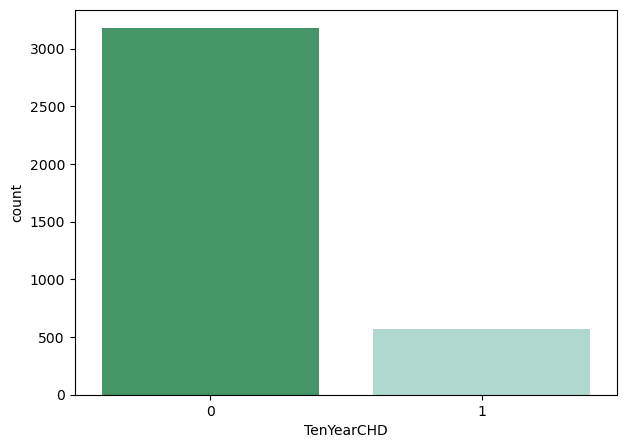

In [49]:
plt.figure(figsize=(7, 5))
sns.countplot(x='TenYearCHD', data=disease_df,
             palette="BuGn_r")
plt.show()
# We use a value_count result from the previously written code to find the outcome of the affected patients with cardiac CHD.
#Counting number of patients affected by CHD where (0= Not Affected; 1= Affected)

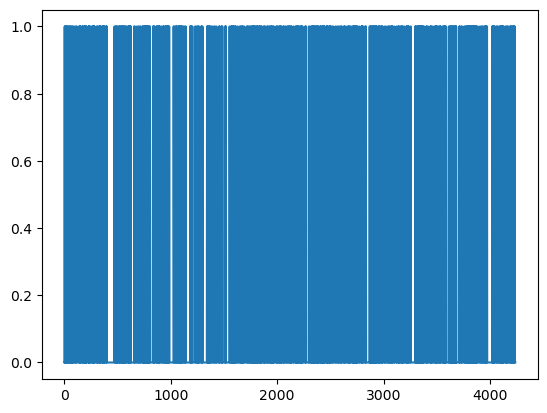

Proportion of Not Affected: 0.8475073313782991
Proportion of Affected: 0.15249266862170088


In [50]:
laste = disease_df['TenYearCHD'].plot()
plt.show(laste)
chd_proportion = disease_df['TenYearCHD'].value_counts(normalize=True)
print("Proportion of Not Affected:", chd_proportion[0])
print("Proportion of Affected:", chd_proportion[1])


In [51]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [92]:
from sklearn.metrics import accuracy_score
print('Accuracy of the model is =', 
      accuracy_score(y_test, y_pred))


Accuracy of the model is = 0.8490230905861457


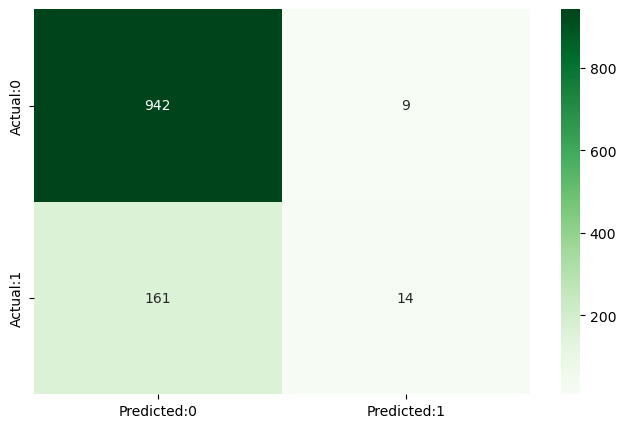

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       951
           1       0.61      0.08      0.14       175

    accuracy                           0.85      1126
   macro avg       0.73      0.54      0.53      1126
weighted avg       0.82      0.85      0.80      1126



In [54]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['Predicted:0', 'Predicted:1'], 
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))


In [100]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])
pred_df.value_counts()

Test Y
0         951
1         175
Name: count, dtype: int64

In [95]:
subset_y_pred = y_pred[:951] #we use 951 to prevent possible concatenating problems
test_predictions = pd.Series(subset_y_pred)# Convert the sliced array into a Pandas Sesrie
test_predictions.value_counts()

(951,)

In [89]:
pred_dff = pd.concat([pred_df,test_predictions],axis=1)
pred_dff.columns = ['Test Y','Model Predictions']
pred_dff

,Test Y,Model Predictions
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
1121,0,NaN
1122,0,NaN
1123,0,NaN
1124,0,NaN


In [98]:
print("Shape of Test Y:", y_test.shape)
print("Shape of Model Predictions:", y_pred.shape)
pred_df = pd.DataFrame({'Test Y': y_test, 'Model Predictions': y_pred})
print("Shape of pred_df:", pred_df.shape)
pred_df.head()

Shape of Test Y: (1126,)
Shape of Model Predictions: (1126,)
Shape of pred_df: (1126, 2)


,Test Y,Model Predictions
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [99]:
subset_test_y = pred_df['Test Y'][:951]
matching_predictions = (subset_test_y == subset_y_pred).sum()
print("Number of matching predictions:", matching_predictions)


Number of matching predictions: 806
